In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (make_blobs, make_circles, make_moons)

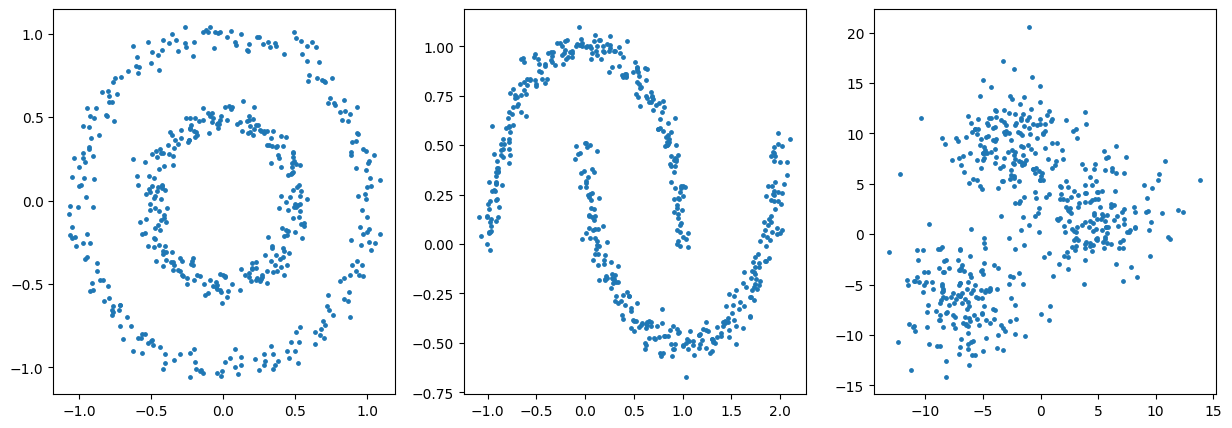

In [2]:
X1 = make_circles(factor=0.5, noise=0.05, n_samples=500)
X2 = make_moons(n_samples=500, noise=0.05)
X3 = make_blobs(n_samples=500, random_state=42, cluster_std=3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X1[0][:, 0], X1[0][:, 1], s=6)

plt.subplot(1, 3, 2)
plt.scatter(X2[0][:, 0], X2[0][:, 1], s=6)

plt.subplot(1, 3, 3)
plt.scatter(X3[0][:, 0], X3[0][:, 1], s=6)

plt.show()
# X1[0]

In [6]:
def gaussian(x, y, x0, y0, sigma=1):
    return np.exp(-((x - x0)**2 + (y - y0)**2) / (2 * sigma**2))

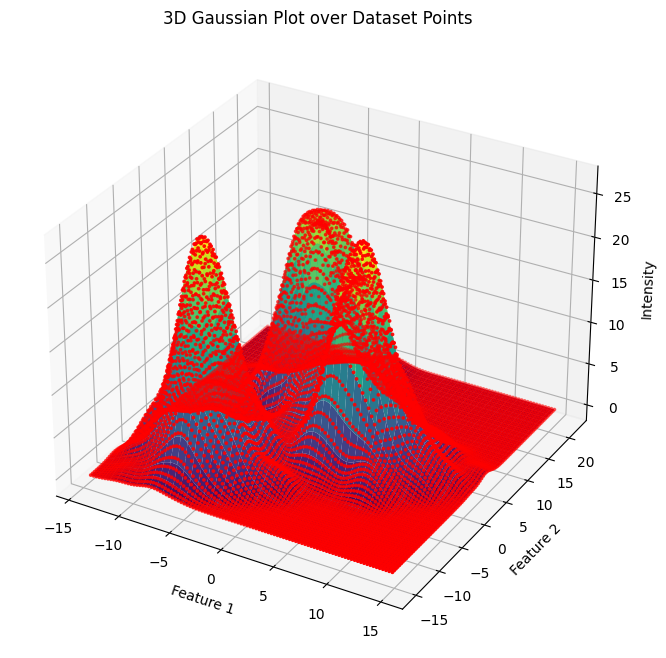

In [19]:
X = X3[0]

s = 1
# Function to generate a Gaussian peak at each data point

# Meshgrid for evaluation
grid = 400
x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, grid+1)
y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, grid+1)
x, y = np.meshgrid(x, y)

# Compute the sum of Gaussians at each grid point
z = np.zeros_like(x)
for point in X:
    z += gaussian(x, y, point[0], point[1], 1.2)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('3D Gaussian Plot over Dataset Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Intensity')


# add ball
ball = 100
ball_x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, ball+1)
ball_y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, ball+1)
ball_x, ball_y = np.meshgrid(ball_x, ball_y)

ball_z = np.array([[z[i][j] for j in np.arange(0, 400+400//ball, 400//ball)] for i in np.arange(0, 400+400//ball, 400//ball)])

ax.scatter3D(ball_x, ball_y, ball_z, c='r', s=3)

plt.show()

Text(0.5, 0, 'Intensity')

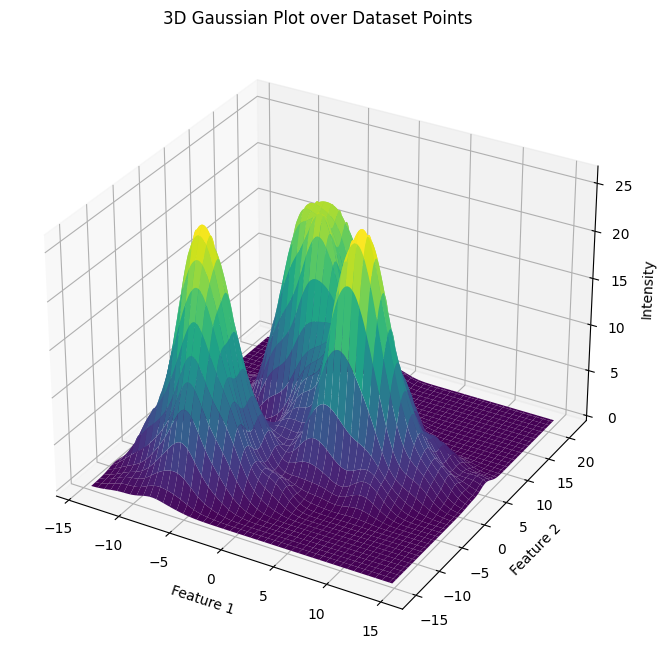

In [20]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('3D Gaussian Plot over Dataset Points')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Intensity')

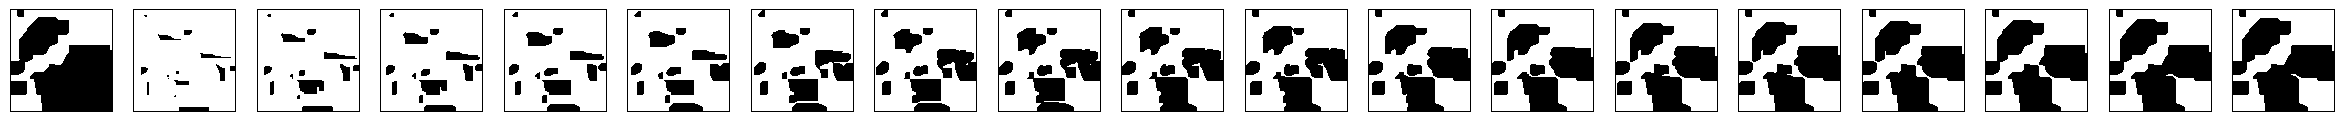

In [61]:
delta = [[-1, 0], [1, 0], [0, -1], [0, 1]]

level = np.zeros((ball+3, ball+3))
level[1:ball+2, 1:ball+2] = ball_z.copy()

level_array = [level.copy()]

level_bin = np.zeros((ball+3, ball+3))
level_bin[1:ball+2, 1:ball+2] = np.ones((ball+1, ball+1))
level_bin_array = [level_bin]

gen = 0
gen_num = 19
while gen < gen_num:
    for i in range(1, ball+2):
        for j in range(1, ball+2):
            flag = 1
            for d in delta:
                if level[i+d[0], j+d[1]] >= level[i, j]:
                    flag = 0
                    break
            if flag:
                level[i, j] = 0
                level_bin[i, j] =0

    gen += 1
    level_array.append(level.copy())
    level_bin_array.append(level_bin.copy())



plt.figure(figsize=(30, 30*gen_num))

for i in range(gen_num):
    plt.subplot(1, gen_num, i+1)
    plt.axis("off")
    plt.imshow(level_bin_array[i], cmap='gray')
    
plt.show()

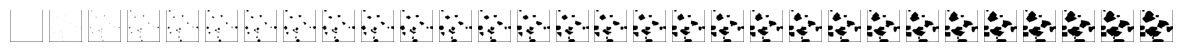

In [7]:
delta = [[-1, 0], [1, 0], [0, -1], [0, 1]]

level = np.zeros((ball+3, ball+3))
level[1:ball+2, 1:ball+2] = ball_z.copy()

level_array = [level.copy()]

level_bin = np.zeros((ball+3, ball+3))
level_bin[1:ball+2, 1:ball+2] = np.ones((ball+1, ball+1))
level_bin_array = [level_bin]

gen = 1
gen_num = 30
while gen < gen_num:
    temp = level.copy()
    temp_bin = level_bin.copy()
    for i in range(1, ball+2):
        for j in range(1, ball+2):
            flag = 1
            for d in delta:
                if level[i+d[0], j+d[1]] >= level[i, j]:
                    flag = 0
                    break
            if flag:
                temp[i, j] = 0
                temp_bin[i, j] = 0

    gen += 1
    level_array.append(temp)
    level_bin_array.append(temp_bin)

    level = temp
    level_bin = temp_bin


plt.figure(figsize=(15, 15*gen_num))

for i in range(len(level_bin_array)):
    plt.subplot(1, gen_num, i+1)
    plt.axis("off")
    plt.imshow(level_bin_array[i], cmap='gray')
    
plt.show()

In [8]:
print(len(level_bin_array))
print(gen_num)

31
30


In [8]:
def plot_level(level_bin_array, size1 = 2):
    gen_num = len(level_bin_array)
    rows = gen_num//10 + 1
    plt.figure(figsize=(size1*10, size1*rows))

    for i in range(len(level_bin_array)):
        plt.subplot(rows, 10, i+1)
        plt.title(f"gen : {i}")
        plt.axis("off")
        plt.imshow(level_bin_array[i], cmap='gray')

    plt.show()

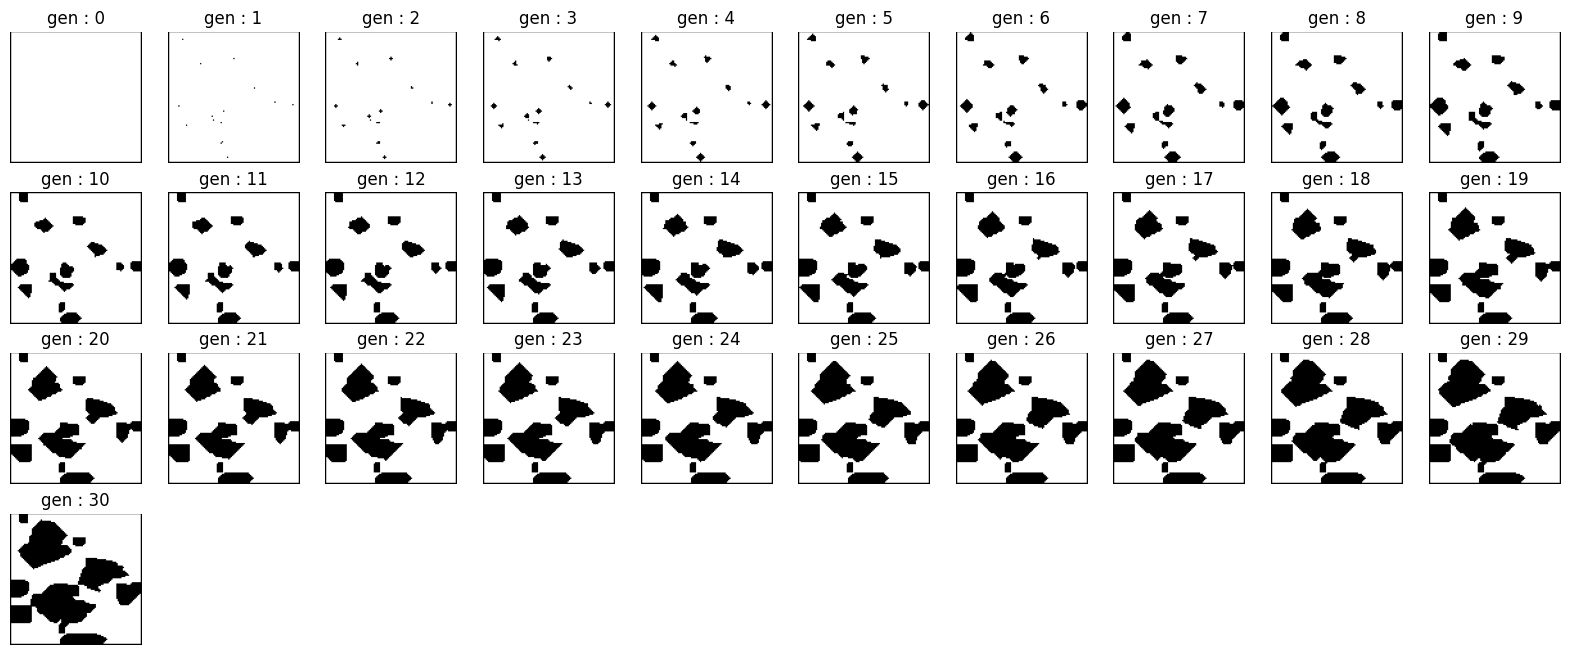

In [18]:
plot_level(level_bin_array)

In [4]:
def gen_simul(data, grid, ball, sigma, gen_num):
    X = data
    x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, grid+1)
    y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, grid+1)
    x, y = np.meshgrid(x, y)

    # Compute the sum of Gaussians at each grid point
    z = np.zeros_like(x)
    for point in X:
        z += gaussian(x, y, point[0], point[1], sigma=sigma)

    # add ball
    ball_x = np.linspace(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, ball+1)
    ball_y = np.linspace(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, ball+1)
    ball_x, ball_y = np.meshgrid(ball_x, ball_y)

    ball_z = np.array([[z[i][j] for j in np.arange(0, 400+400//ball, 400//ball)] for i in np.arange(0, 400+400//ball, 400//ball)])

    # iter
    delta = [[-1, 0], [1, 0], [0, -1], [0, 1]]

    level = np.zeros((ball+3, ball+3))
    level[1:ball+2, 1:ball+2] = ball_z.copy()

    level_array = [level.copy()]

    level_bin = np.zeros((ball+3, ball+3))
    level_bin[1:ball+2, 1:ball+2] = np.ones((ball+1, ball+1))
    level_bin_array = [level_bin]

    gen = 1
    while gen < gen_num:
        temp = level.copy()
        temp_bin = level_bin.copy()
        for i in range(1, ball+2):
            for j in range(1, ball+2):
                flag = 1
                for d in delta:
                    if level[i+d[0], j+d[1]] >= level[i, j]:
                        flag = 0
                        break
                if flag:
                    temp[i, j] = 0
                    temp_bin[i, j] = 0

        gen += 1
        level_array.append(temp)
        level_bin_array.append(temp_bin)

        level = temp
        level_bin = temp_bin

    plot_level(level_bin_array, size1=2)

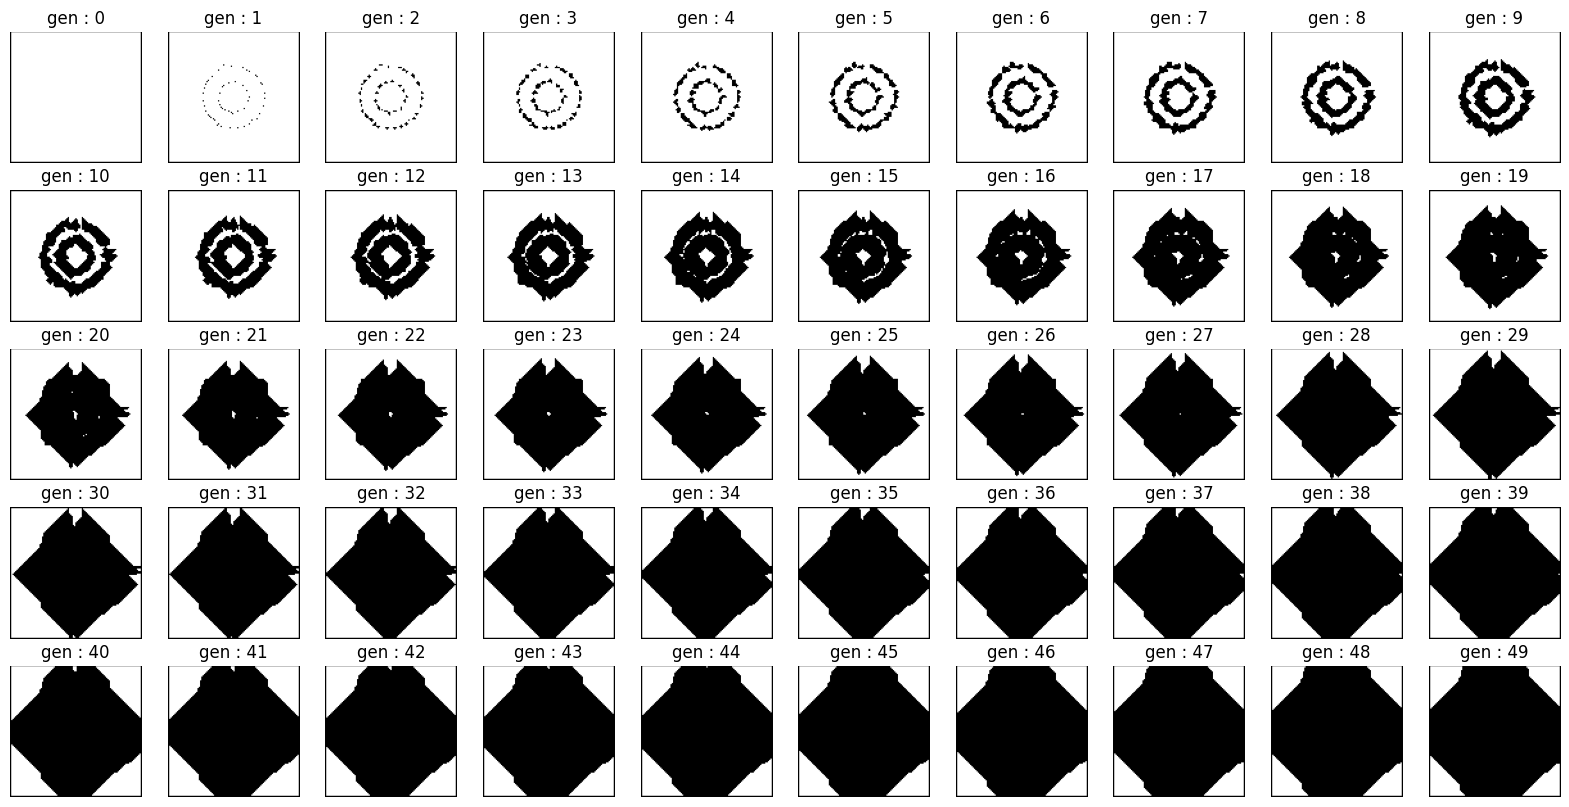

In [45]:
gen_simul(X1[0], 400, 100, 0.05, 50)

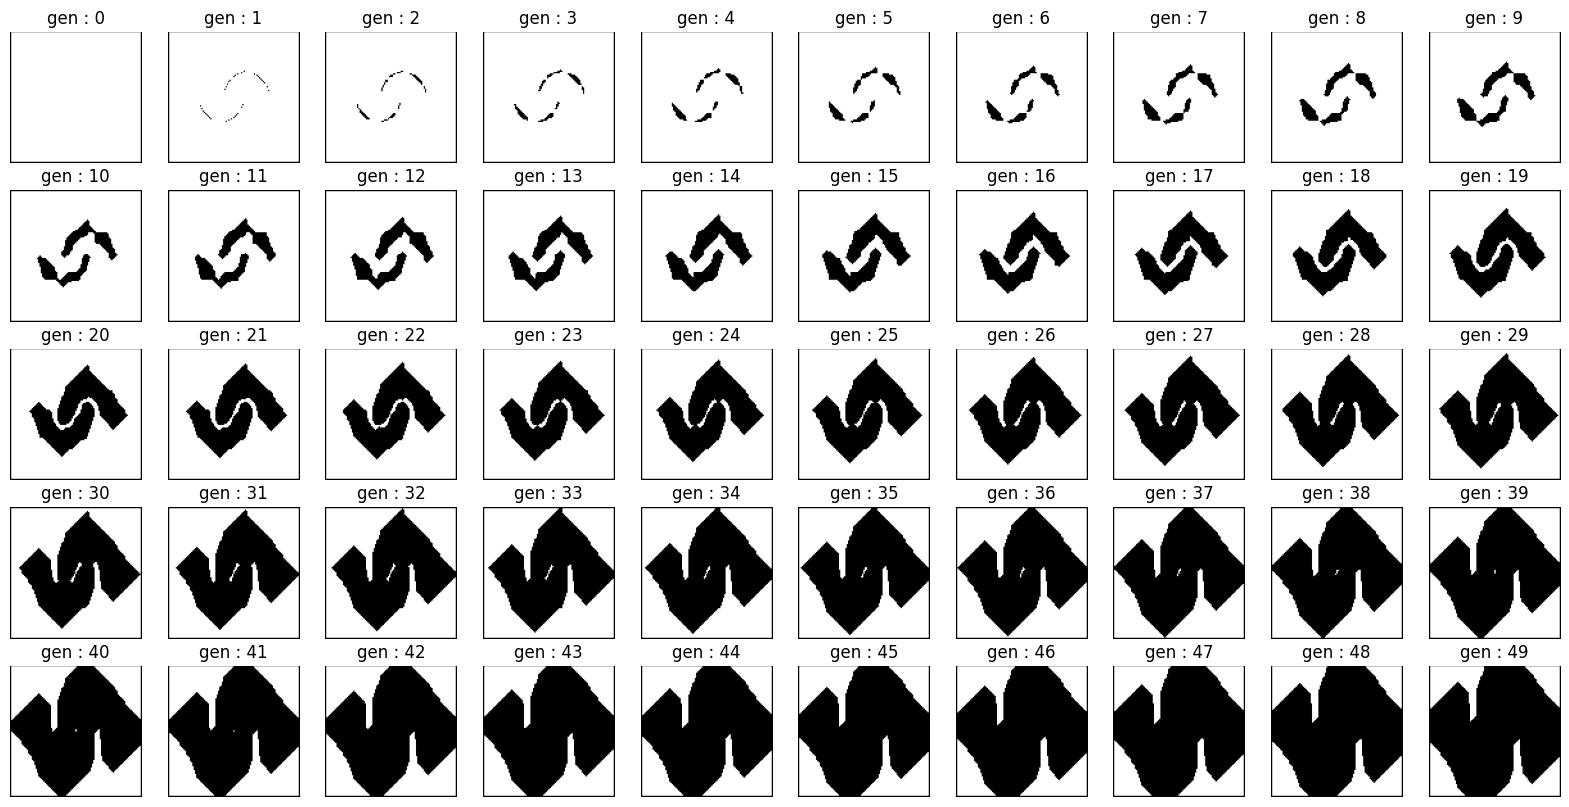

In [47]:
gen_simul(X2[0], 400, 100, 0.2, 50)

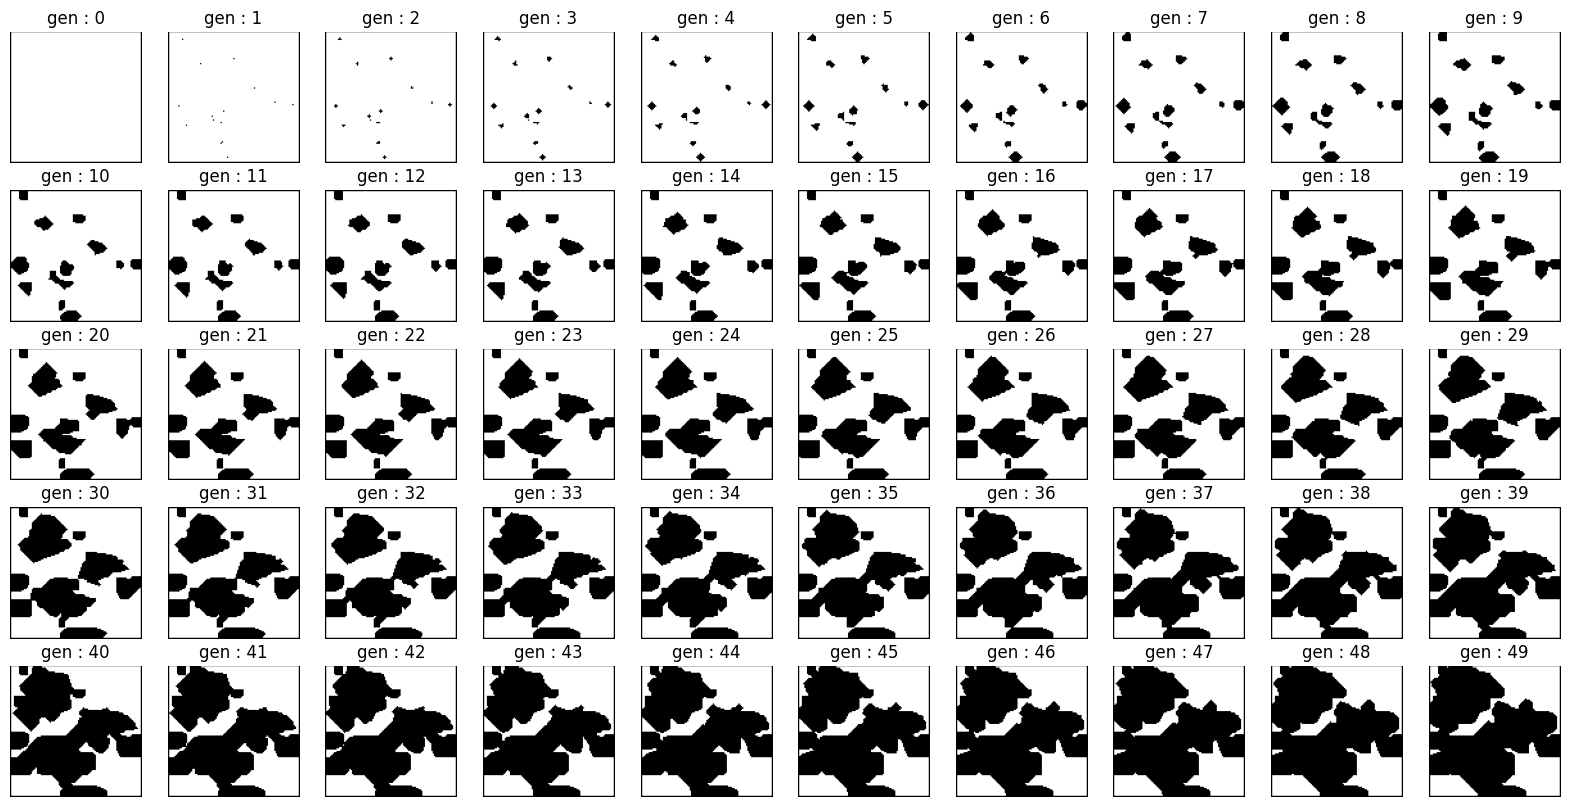

In [11]:
gen_simul(X3[0], 400, 100, 1, 50)

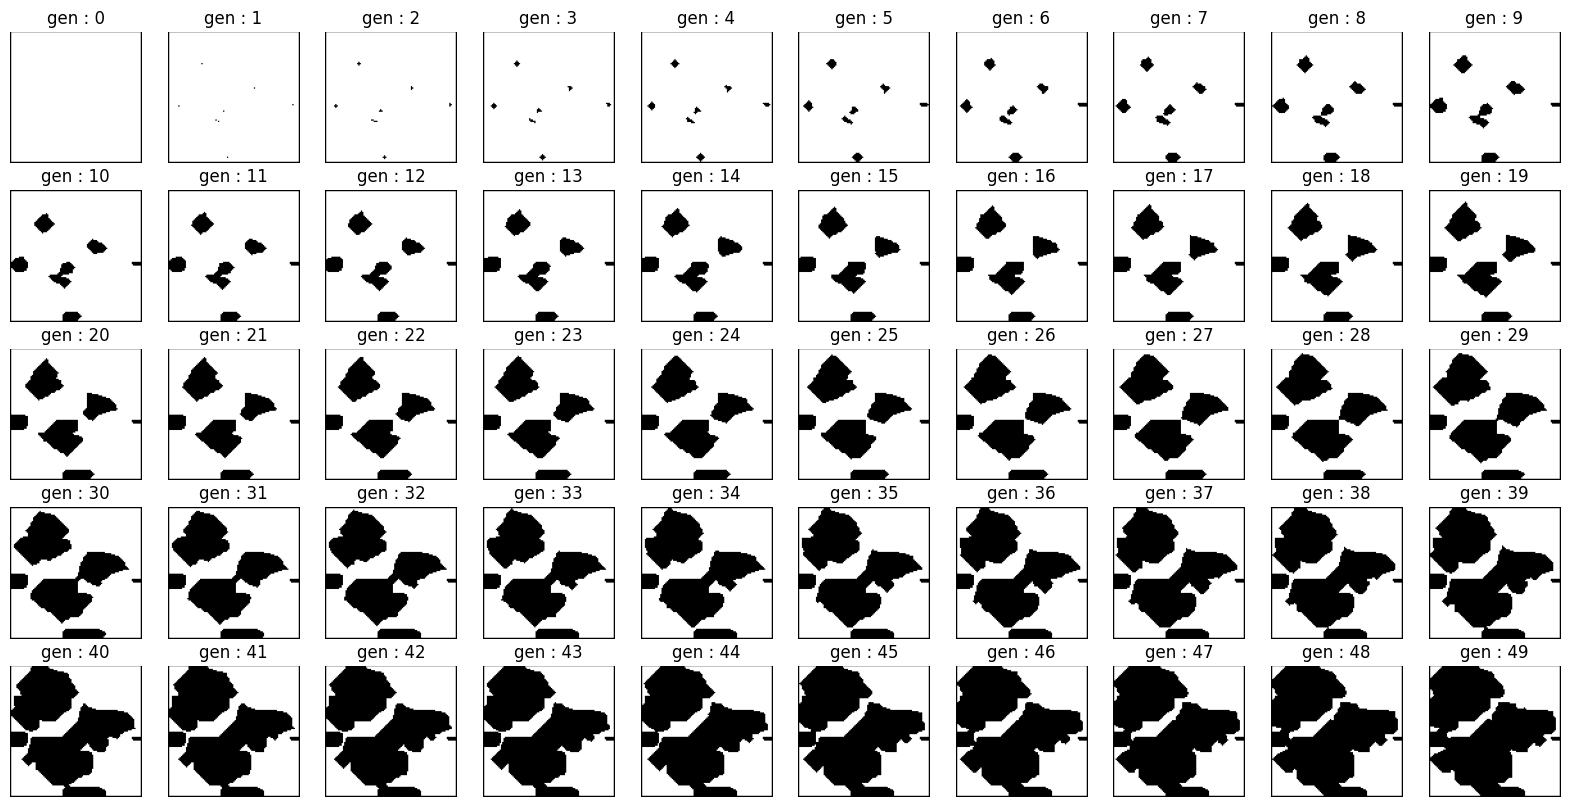

In [14]:
gen_simul(X3[0], 400, 100, 1.2, 50)

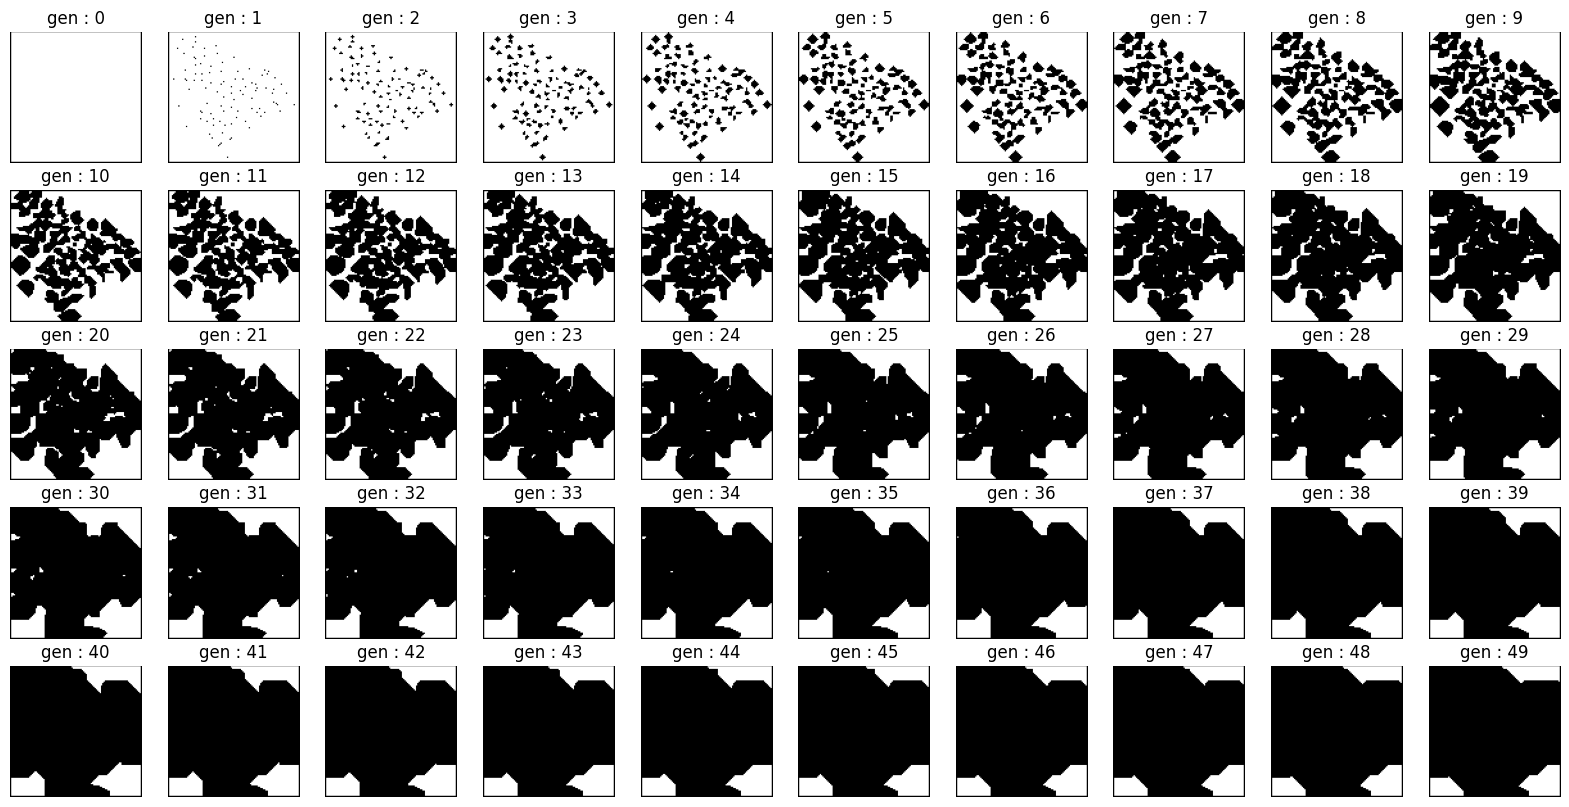

In [12]:
gen_simul(X3[0], 400, 100, 0.5, 50)

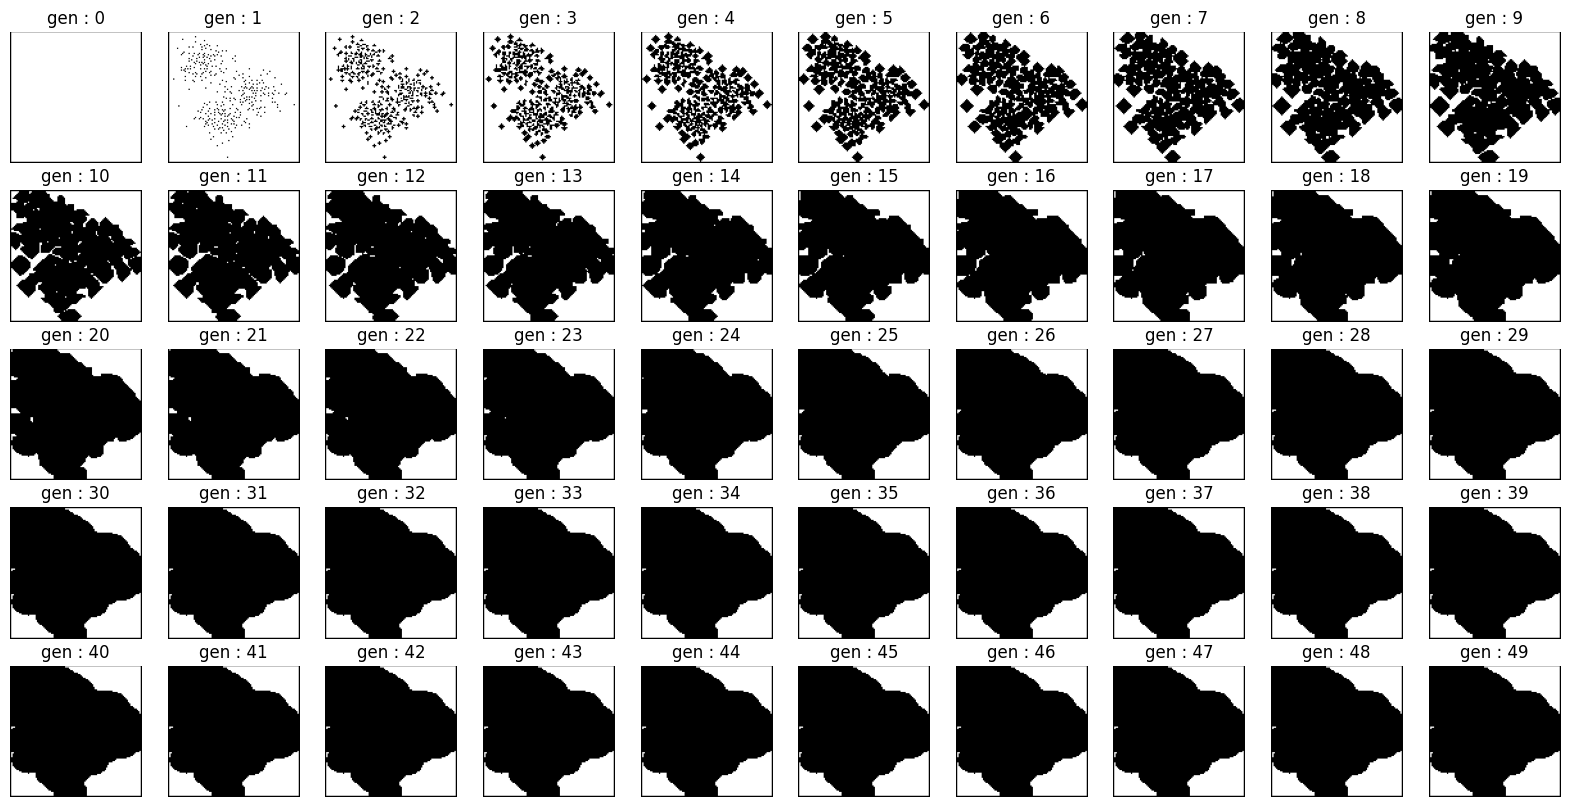

In [9]:
gen_simul(X3[0], 400, 100, 0.1, 50)